In [1]:
import pandas as pd

In [7]:
data = pd.read_csv(r"C:\Users\kepur\Downloads\Halloween+Candy+Rankings\candy-data.csv")
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [17]:
subset = data.iloc[:, 1:-3] #we want just flavours
subset.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
0,1,0,1,0,0,1,0,1,0
1,1,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0


In [21]:
#apply PCA(principal component analysis)
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=2)

In [27]:
pca.fit(subset)

PCA(n_components=2)

In [29]:
pca.explained_variance_ratio_

array([0.45736631, 0.15454393])

In [33]:
candy_2d=pd.DataFrame(pca.transform(subset))
candy_2d.head()

,0,1
0,1.305021,-0.335978
1,1.123628,-0.294698
2,0.034733,-0.204088
3,0.034733,-0.204088
4,-0.469043,-0.565369


<Axes: xlabel='0', ylabel='1'>

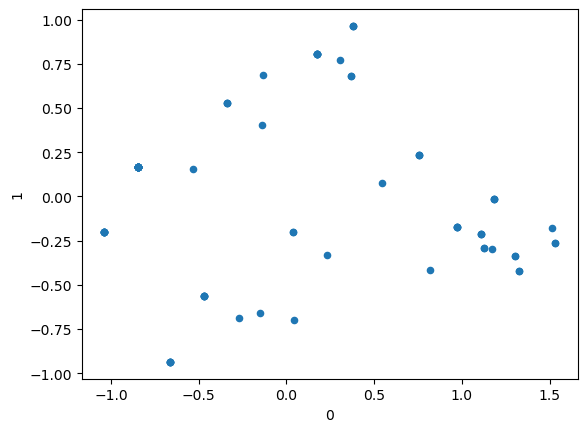

In [37]:
candy_2d.plot(kind='scatter',x=0, y=1) #scatter plot of candies

In [39]:
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [51]:
#add noise to see more candies(dots)
import numpy as np

<Axes: xlabel='x_jitter', ylabel='y_jitter'>

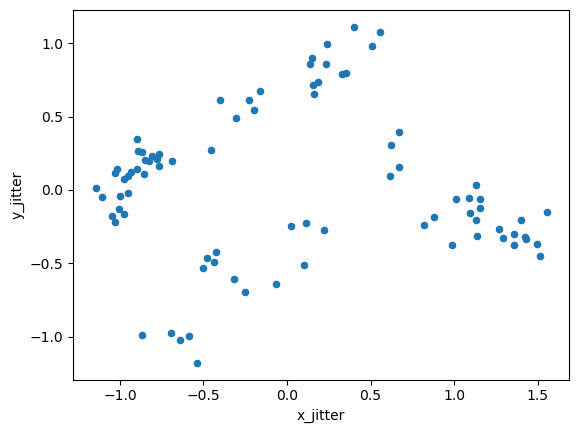

In [49]:
data['x_jitter'] = candy_2d[0] + np.random.randn(85)*.1
data['y_jitter'] = candy_2d[1] + np.random.randn(85)*.1
data.plot(kind='scatter', x='x_jitter', y='y_jitter')

In [57]:
data.to_csv('candy-data-pca.csv')